In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from trieste.observer import INEQUALITY_CONSTRAINT_PREFIX, OBJECTIVE

OBJECTIVE = "OBJECTIVE"
INEQUALITY_CONSTRAINT_ONE = "INEQUALITY_CONSTRAINT_ONE"
INEQUALITY_CONSTRAINT_TWO = "INEQUALITY_CONSTRAINT_TWO"

2023-10-07 12:33:17.665688: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def process_results(result_dir: str,
                    num_runs: int,
                    failure_val: float,
                    objective_multiplier: float):
    all_results = []
    for run in range(num_runs):
        run_file = result_dir + f"run_{run}_data.pkl"
        with open(run_file, "rb") as fp:
            run_data = pickle.load(fp)
        satisfied_mask = np.full(shape=run_data[OBJECTIVE].observations.shape[0], fill_value=True)
        for key in run_data.keys():
            if key.startswith(INEQUALITY_CONSTRAINT_PREFIX):
                inequality_constraint_satisfied = run_data[key].observations.numpy().squeeze() <= 0
                satisfied_mask = np.logical_and(satisfied_mask, inequality_constraint_satisfied)
        failure_mask = np.logical_not(satisfied_mask)
        objective_vals = run_data[OBJECTIVE].observations.numpy().squeeze()
        objective_vals = objective_vals * objective_multiplier
        safe_obs_values = objective_vals.copy()
        safe_obs_values[failure_mask] = failure_val
        all_results.append(np.minimum.accumulate(safe_obs_values))
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

### Lockwood

In [35]:
ts_al_lockwood_res, ts_al_lockwood_mean, ts_al_lockwood_median, ts_al_lockwood_std = process_results("final_ts_al_results/lockwood/trust_region/data/", num_runs=30, failure_val=60000.0, objective_multiplier=10000.0)
scbo_lockwood_res, scbo_lockwood_mean, scbo_lockwood_median, sbco_lockwood_std = process_results("final_scbo_results/lockwood/trust_region/data/", num_runs=30, failure_val=60000.0, objective_multiplier=10000.0)
eci_lockwood_res, eci_lockwood_mean, eci_lockwood_median, eci_lockwood_std  = process_results("eci_results/lockwood/data/", num_runs=26, failure_val=60000.0, objective_multiplier=10000.0)

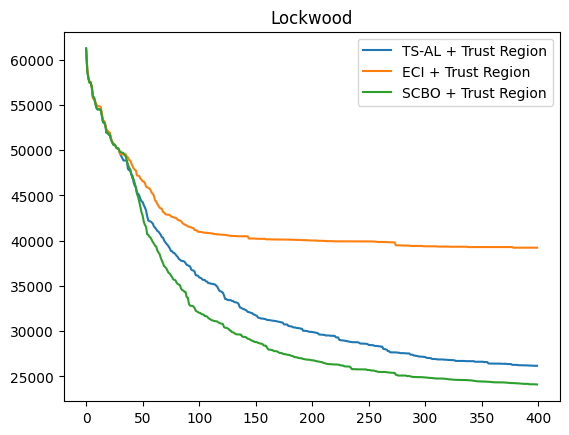

In [38]:
plt.plot(ts_al_lockwood_mean, label="TS-AL + Trust Region")
plt.plot(eci_lockwood_mean, label="ECI + Trust Region")
plt.plot(scbo_lockwood_mean, label="SCBO + Trust Region")
plt.title("Lockwood")
plt.legend()

### Ackley10

In [24]:
random_ackley_10_res, random_ackley_10_mean, random_ackley_10_median, random_ackley_10_std = process_results("random_baseline_results/ackley_10/data/", num_runs=30, failure_val=10.0, objective_multiplier=10.0)
scbo_ackley_10_res, scbo_ackley_10_mean, scbo_ackley_10_median, scbo_ackley_10_std = process_results("final_scbo_results/updated_ackley_10/trust_region/data/", num_runs=30, failure_val=10.0, objective_multiplier=10.0)
ts_al_ackley_10_res, ts_al_ackley_10_mean, ts_al_ackley_10_median, ts_al_ackley_10_std = process_results("final_ts_al_results/updated_ackley_10/trust_region/data/", num_runs=30, failure_val=10.0, objective_multiplier=10.0)

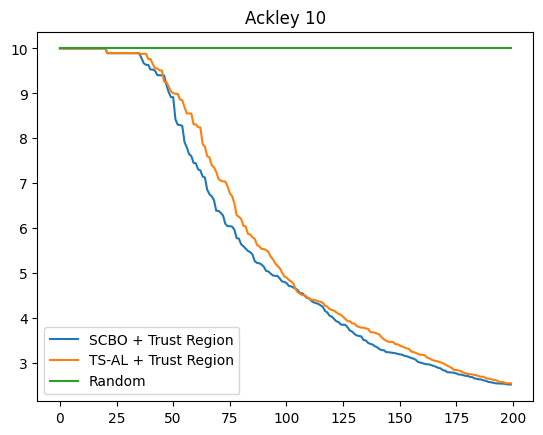

In [25]:
plt.plot(scbo_ackley_10_mean, label="SCBO + Trust Region")
plt.plot(ts_al_ackley_10_mean, label="TS-AL + Trust Region")
plt.plot(random_ackley_10_mean, label="Random")
plt.title("Ackley 10")
plt.legend()

### Keane30

In [21]:
random_keane_30_res, random_keane_30_mean, random_keane_30_median, random_keane_30_std = process_results("random_baseline_results/keane_30/data/", num_runs=30, failure_val=-0.1, objective_multiplier=0.1)
scbo_keane_30_res, scbo_keane_30_mean, scbo_keane_30_median, scbo_keane_30_std = process_results("final_scbo_results/updated_keane_30/data/", num_runs=30, failure_val=-0.1, objective_multiplier=0.1)
ts_al_keane_30_res, ts_al_keane_30_mean, ts_al_keane_30_median, ts_al_keane_30_std = process_results("final_ts_al_results/updated_keane_30/data/", num_runs=30, failure_val=-0.1, objective_multiplier=0.1)

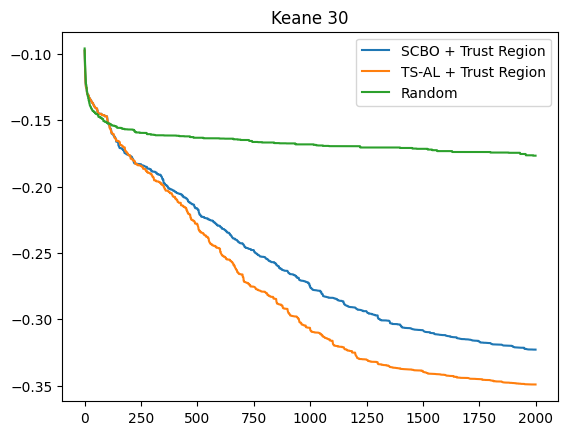

In [22]:
plt.plot(scbo_keane_30_mean, label="SCBO + Trust Region")
plt.plot(ts_al_keane_30_mean, label="TS-AL + Trust Region")
plt.plot(random_keane_30_mean, label="Random")
plt.title("Keane 30")
plt.legend()

### Mazda

In [18]:
random_mazda_res, random_mazda_mean, random_mazda_median, random_mazda_std = process_results("random_baseline_results/mazda/data/", num_runs=6, failure_val=10.0, objective_multiplier=1.0)
scbo_mazda_res, scbo_mazda_mean, scbo_mazda_median, scbo_mazda_std = process_results("final_scbo_results/mazda/data/", num_runs=6, failure_val=10.0, objective_multiplier=1.0)
ts_al_mazda_res, ts_al_mazda_mean, ts_al_mazda_median, ts_al_mazda_std = process_results("final_ts_al_results/mazda/data/", num_runs=6, failure_val=10.0, objective_multiplier=1.0)

In [31]:
ts_al_mazda_res[:, 800]

array([3.13164244, 3.08611079, 3.05033097, 3.1005464 , 3.0991279 ,
       3.03547116])

In [34]:
scbo_mazda_res[:, 1000]

array([3.0709782 , 3.04378802, 3.05109079, 3.04842212, 3.03152486,
       3.10197308])